# Step 1. Data Processing

In [148]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,roc_auc_score
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import math
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [149]:
Datatrain=pd.read_csv('/Users/zhuyani/Desktop/Data-train.csv',index_col=0)
Datatrain.head()

,productID,brandID,attribute1,attribute2,attribute3,attribute4,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,weekday,meanAge,gender,meanEducation,maritalStatus,plus,meanPurchasePower,meanUserLevel,meanCityLevel,sales
0,68,28,3,100,9,1.561599,799,237.206500,186.956967,11.785714,4,35.498327,0.114401,3.046749,0.562923,0.206291,2.173474,3.628150,2.181482,14
1,31,6,3,100,2,7.747685,352,178.540538,129.123143,25.785714,7,25.633478,0.000000,3.005766,0.000000,0.444095,1.927769,3.058834,1.511026,2
2,27,19,3,60,2,3.899665,293,119.066221,59.136199,21.357143,6,32.228120,0.158911,2.935705,0.293093,0.132959,2.324772,2.650857,1.665037,16
3,52,4,3,80,1,1.585429,537,139.452545,68.572100,7.285714,5,29.304317,0.186522,2.810752,0.242181,0.000000,2.192938,2.026259,2.481082,13
4,3,28,3,100,14,4.623051,6668,298.106532,244.047761,296.214286,5,29.132081,0.300183,3.032527,0.391279,0.103062,2.135294,2.736957,1.979200,159


In [150]:
Datatest=pd.read_csv('/Users/zhuyani/Desktop/Data-test.csv',index_col=0)
Datatest.head()

,productID,brandID,attribute1,attribute2,attribute3,attribute4,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,weekday,meanAge,gender,meanEducation,maritalStatus,plus,meanPurchasePower,meanUserLevel,meanCityLevel
0,77,38,3.0,100.0,2,5.670374,173.0,180.835683,165.459988,12.857143,4,26.960521,0.053158,2.958528,0.668194,0.148227,2.347953,2.638135,1.997034
1,47,30,4.0,100.0,9,5.191429,142.0,190.802856,138.995392,2.285714,5,33.111475,0.317086,3.292282,0.709143,0.272464,2.409795,3.973464,1.385002
2,33,25,3.0,100.0,1,2.461109,144.0,127.385574,123.286542,4.500000,6,30.353550,0.000000,2.668048,1.002511,0.000000,1.955541,2.937542,2.369596
3,68,28,3.0,100.0,2,4.659192,220.0,240.873276,168.258175,17.500000,6,29.692379,0.000000,2.470400,0.424764,0.000000,1.932938,2.480643,2.505191
4,65,16,3.0,90.0,2,15.554293,4079.0,85.013188,68.521885,115.785714,7,33.128355,0.201974,2.432218,0.592206,0.005535,2.428117,1.792081,2.669685


In [151]:
Datatrain_array = Datatrain.to_numpy().reshape(-1, 1)
Datatest_array = Datatest.to_numpy().reshape(-1, 1)
# Convert train_data into a NumPy array and reshape it into a column vector 
# to ensure that the data is fed into the machine learning model in the correct shape.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,roc_auc_score
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import math
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

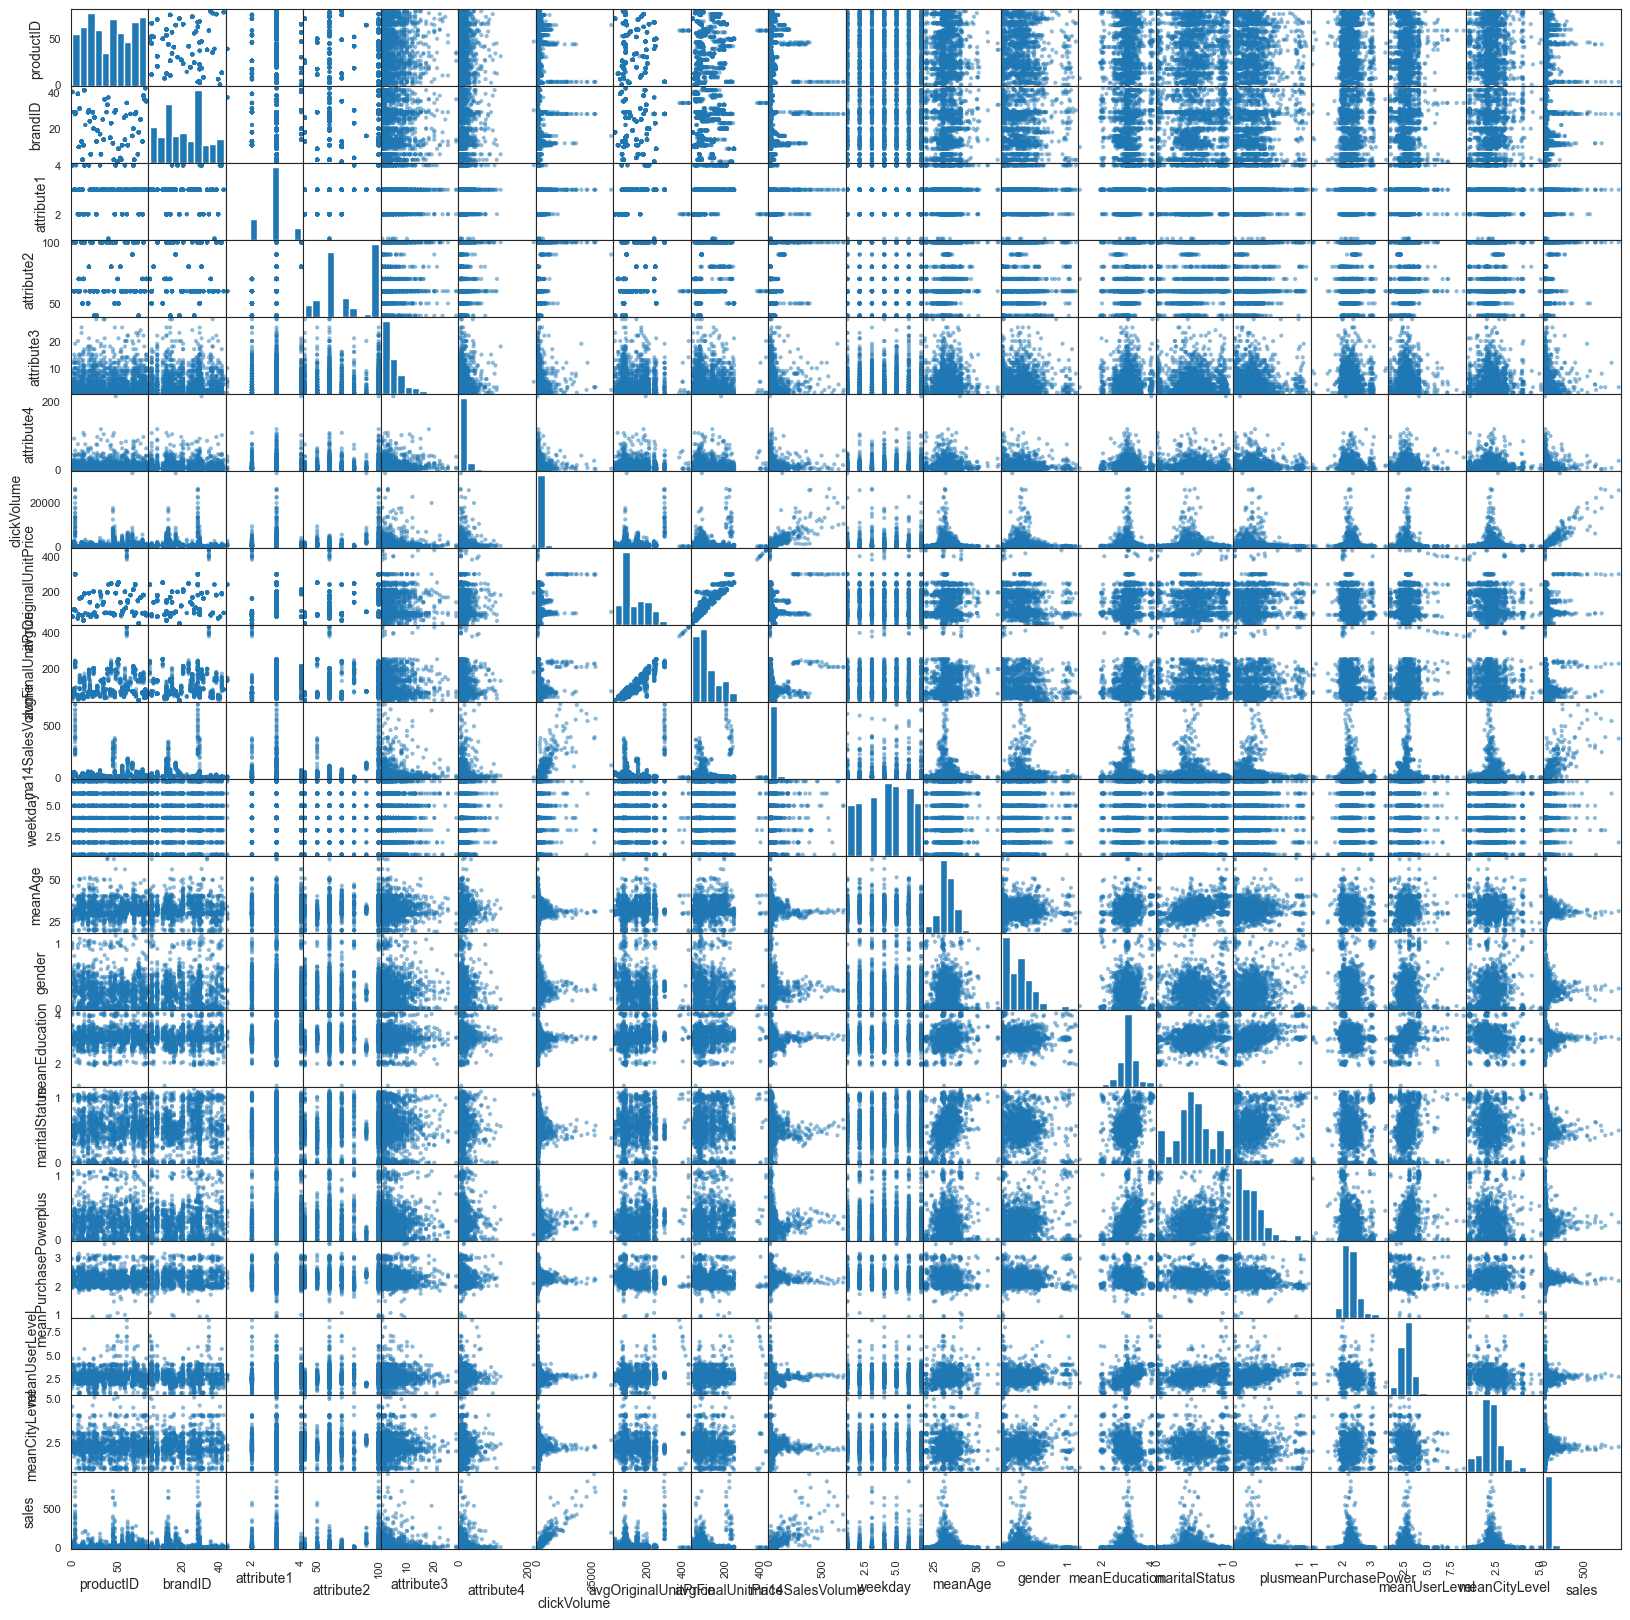

In [152]:
scatter_matrix(Datatrain,figsize=(20,20))
plt.show()

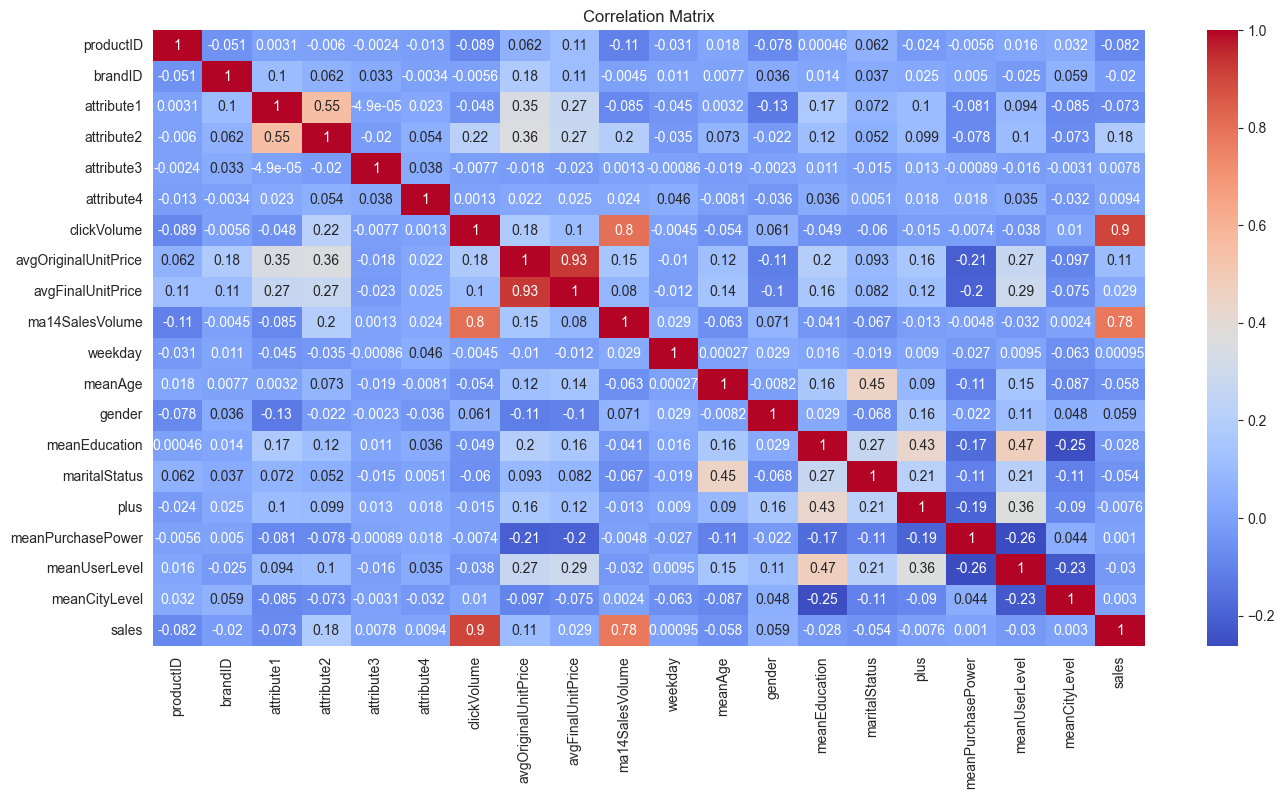

In [187]:
# Correlation analysis
correlation_matrix = Datatrain.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [153]:
X=Datatrain.drop('sales', axis=1)
# Remove the column 'sales' from train_data and store the result in the variable X
y=Datatrain.sales
# store the column 'sales' in the variable Y
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state =30)
# Divide the datasets X and y into training and testing sets
# the random seed is set to 30 to ensure the same division result every time you run the code

In [154]:
ridge_model = Ridge(alpha=1000)  
# Adjust the alpha parameter to control the strength of the regularisation
ridge_model.fit(X, y)
print("Coefficients:", ridge_model.coef_)

Coefficients: [ 0.04622891 -0.07256949 -0.17609898 -0.04848895  0.21396701  0.03218725
  0.02485298  0.06569929 -0.14692912  0.16778009 -0.06180418  0.03391476
 -0.15137932  0.72898551  0.12113123  0.19092309 -0.06030655  1.10190281
 -0.2858331 ]


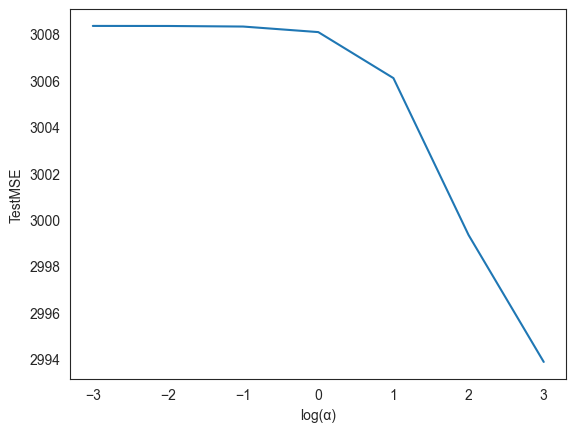

Best alpha: 1000
MSE: 2993.874975612951


In [155]:
alphas = [0.001,0.01,0.1,1,10,100,1000]
mse_values = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    y_pred_ridge = ridge_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred_ridge)
    mse_values.append(mse)

plt.plot(np.log10(alphas), mse_values)
plt.xlabel('log(α)')
plt.ylabel('TestMSE')
plt.show()

best_alpha = alphas[np.argmin(mse_values)]
best_mse = np.min(mse_values)
print("Best alpha:", best_alpha)
print("MSE:", best_mse)

In [157]:
import statsmodels.formula.api as smf
results = smf.ols('sales ~ attribute2:avgOriginalUnitPrice	', data=Datatrain).fit()
print(results.summary())#wait

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     58.25
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           3.98e-14
Time:                        18:44:05   Log-Likelihood:                -9133.7
No. Observations:                1576   AIC:                         1.827e+04
Df Residuals:                    1574   BIC:                         1.828e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [158]:
import statsmodels.formula.api as smf
results = smf.ols('sales ~ attribute2:weekday	', data=Datatrain).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     14.21
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           0.000170
Time:                        18:44:10   Log-Likelihood:                -9155.2
No. Observations:                1576   AIC:                         1.831e+04
Df Residuals:                    1574   BIC:                         1.833e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             20.7910      4

In [159]:
results = smf.ols('sales ~ attribute2:meanAge	', data=Datatrain).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     20.69
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           5.81e-06
Time:                        18:44:16   Log-Likelihood:                -9152.0
No. Observations:                1576   AIC:                         1.831e+04
Df Residuals:                    1574   BIC:                         1.832e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.8819      6

In [160]:
results = smf.ols('sales ~ attribute2:meanPurchasePower	', data=Datatrain).fit()
print(results.summary())#wait

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     44.79
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           3.03e-11
Time:                        18:44:47   Log-Likelihood:                -9140.2
No. Observations:                1576   AIC:                         1.828e+04
Df Residuals:                    1574   BIC:                         1.830e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [161]:
results = smf.ols('sales ~ attribute4:avgOriginalUnitPrice	', data=Datatrain).fit()
print(results.summary())#drop

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.362
Date:                Sun, 17 Mar 2024   Prob (F-statistic):             0.0669
Time:                        18:44:53   Log-Likelihood:                -9160.6
No. Observations:                1576   AIC:                         1.833e+04
Df Residuals:                    1574   BIC:                         1.834e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [162]:
results = smf.ols('sales ~ attribute4:weekday	', data=Datatrain).fit()
print(results.summary())#drop

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.009257
Date:                Sun, 17 Mar 2024   Prob (F-statistic):              0.923
Time:                        18:44:58   Log-Likelihood:                -9162.3
No. Observations:                1576   AIC:                         1.833e+04
Df Residuals:                    1574   BIC:                         1.834e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             34.5697      2

In [163]:
results = smf.ols('sales ~ attribute4:meanAge	', data=Datatrain).fit()
print(results.summary())#drop

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.008517
Date:                Sun, 17 Mar 2024   Prob (F-statistic):              0.926
Time:                        18:45:03   Log-Likelihood:                -9162.3
No. Observations:                1576   AIC:                         1.833e+04
Df Residuals:                    1574   BIC:                         1.834e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             34.5465      2

In [164]:
results = smf.ols('sales ~ attribute4:meanPurchasePower	', data=Datatrain).fit()
print(results.summary())#drop

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1153
Date:                Sun, 17 Mar 2024   Prob (F-statistic):              0.734
Time:                        18:45:08   Log-Likelihood:                -9162.2
No. Observations:                1576   AIC:                         1.833e+04
Df Residuals:                    1574   BIC:                         1.834e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [165]:
results = smf.ols('sales ~ avgOriginalUnitPrice:weekday	', data=Datatrain).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     10.31
Date:                Sun, 17 Mar 2024   Prob (F-statistic):            0.00135
Time:                        18:45:15   Log-Likelihood:                -9157.1
No. Observations:                1576   AIC:                         1.832e+04
Df Residuals:                    1574   BIC:                         1.833e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [166]:
results = smf.ols('sales ~ avgOriginalUnitPrice:meanAge	', data=Datatrain).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     8.248
Date:                Sun, 17 Mar 2024   Prob (F-statistic):            0.00414
Time:                        18:45:21   Log-Likelihood:                -9158.2
No. Observations:                1576   AIC:                         1.832e+04
Df Residuals:                    1574   BIC:                         1.833e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [167]:
results = smf.ols('sales ~ avgOriginalUnitPrice:meanPurchasePower	', data=Datatrain).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     17.86
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           2.51e-05
Time:                        18:45:27   Log-Likelihood:                -9153.4
No. Observations:                1576   AIC:                         1.831e+04
Df Residuals:                    1574   BIC:                         1.832e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [168]:
results = smf.ols('sales ~ weekday:meanAge', data=Datatrain).fit()
print(results.summary())#drop

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5573
Date:                Sun, 17 Mar 2024   Prob (F-statistic):              0.455
Time:                        18:45:33   Log-Likelihood:                -9162.0
No. Observations:                1576   AIC:                         1.833e+04
Df Residuals:                    1574   BIC:                         1.834e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          37.7668      4.595     

In [169]:
results = smf.ols('sales ~ weekday:meanPurchasePower	', data=Datatrain).fit()
print(results.summary())#drop

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.004978
Date:                Sun, 17 Mar 2024   Prob (F-statistic):              0.944
Time:                        18:45:38   Log-Likelihood:                -9162.3
No. Observations:                1576   AIC:                         1.833e+04
Df Residuals:                    1574   BIC:                         1.834e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [170]:
results = smf.ols('sales ~ meanAge:meanPurchasePower	', data=Datatrain).fit()
print(results.summary())#drop

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.169
Date:                Sun, 17 Mar 2024   Prob (F-statistic):             0.0753
Time:                        18:45:52   Log-Likelihood:                -9160.7
No. Observations:                1576   AIC:                         1.833e+04
Df Residuals:                    1574   BIC:                         1.834e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

# 1.1 Process Datatrain data

In [129]:
Datatrain=pd.read_csv('/Users/zhuyani/Desktop/Data-train.csv',index_col=0)

columns_to_drop = ['productID', 'brandID','attribute4']

# Delete specified column
Datatrain= Datatrain.drop(columns=columns_to_drop)
print(Datatrain)

      attribute1  attribute2  attribute3  clickVolume  avgOriginalUnitPrice  \
0              3         100           9          799            237.206500   
1              3         100           2          352            178.540538   
2              3          60           2          293            119.066221   
3              3          80           1          537            139.452545   
4              3         100          14         6668            298.106532   
...          ...         ...         ...          ...                   ...   
1571           4         100           3         1558             89.371417   
1572           3          40           3           74             80.494579   
1573           3          40           2          353             76.912038   
1574           2          50           7         1740             69.920092   
1575           4         100           7          703            189.276037   

      avgFinalUnitPrice  ma14SalesVolume  weekday  

In [130]:
# Add new column based on OLS Regression Results
Datatrain["clickVolume-ma14SalesVolume"] = Datatrain["clickVolume"]*Datatrain["ma14SalesVolume"]
Datatrain["attribute2-avgOriginalUnitPrice"] = Datatrain["attribute2"]*Datatrain["avgOriginalUnitPrice"]
Datatrain["attribute2-weekday"] = Datatrain["attribute2"]*Datatrain["weekday"]
Datatrain["attribute2-meanAge"] = Datatrain["attribute2"]*Datatrain["meanAge"]
Datatrain["attribute2-meanPurchasePower"] = Datatrain["attribute2"]*Datatrain["meanPurchasePower"]
Datatrain["avgOriginalUnitPrice-weekday"] = Datatrain["weekday"]*Datatrain["avgOriginalUnitPrice"]
Datatrain["avgOriginalUnitPrice-meanAge"] = Datatrain["meanAge"]*Datatrain["avgOriginalUnitPrice"]
Datatrain["avgOriginalUnitPrice-meanPurchasePower"] = Datatrain["meanPurchasePower"]*Datatrain["avgOriginalUnitPrice"]
Datatrain.head()

,attribute1,attribute2,attribute3,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,weekday,meanAge,gender,...,meanCityLevel,sales,clickVolume-ma14SalesVolume,attribute2-avgOriginalUnitPrice,attribute2-weekday,attribute2-meanAge,attribute2-meanPurchasePower,avgOriginalUnitPrice-weekday,avgOriginalUnitPrice-meanAge,avgOriginalUnitPrice-meanPurchasePower
0,3,100,9,799,237.206500,186.956967,11.785714,4,35.498327,0.114401,...,2.181482,14,9.416786e+03,23720.649960,400,3549.832688,217.347395,948.825998,8420.433861,515.562148
1,3,100,2,352,178.540538,129.123143,25.785714,7,25.633478,0.000000,...,1.511026,2,9.076571e+03,17854.053830,700,2563.347755,192.776918,1249.783768,4576.614880,344.184947
2,3,60,2,293,119.066221,59.136199,21.357143,6,32.228120,0.158911,...,1.665037,16,6.257643e+03,7143.973236,360,1933.687201,139.486292,714.397324,3837.280448,276.801760
3,3,80,1,537,139.452545,68.572100,7.285714,5,29.304317,0.186522,...,2.481082,13,3.912429e+03,11156.203584,400,2344.345334,175.435022,697.262724,4086.561535,305.810754
4,3,100,14,6668,298.106532,244.047761,296.214286,5,29.132081,0.300183,...,1.979200,159,1.975157e+06,29810.653170,500,2913.208120,213.529368,1490.532659,8684.463688,636.544993


# 1.2 Process Datatest data

In [131]:
Datatest=pd.read_csv('/Users/zhuyani/Desktop/Data-test.csv',index_col=0)

# drop parameters with low correlation
columns_to_drop = ['productID', 'brandID','attribute4']
Datatest= Datatest.drop(columns=columns_to_drop)
print(Datatest)

      attribute1  attribute2  attribute3  clickVolume  avgOriginalUnitPrice  \
0            3.0       100.0           2        173.0            180.835683   
1            4.0       100.0           9        142.0            190.802856   
2            3.0       100.0           1        144.0            127.385574   
3            3.0       100.0           2        220.0            240.873276   
4            3.0        90.0           2       4079.0             85.013188   
...          ...         ...         ...          ...                   ...   
1046         2.0        50.0           1        212.0             70.289424   
1047         4.0       100.0           6       1044.0            210.529395   
1048         3.0       100.0           2       1040.0            235.563711   
1049         3.0       100.0           2        324.0            239.301695   
1050         3.0        60.0           8        598.0             80.759945   

      avgFinalUnitPrice  ma14SalesVolume  weekday  

In [132]:
# Add new column based on OLS Regression Results
Datatest["clickVolume-ma14SalesVolume"] = Datatest["clickVolume"]*Datatest["ma14SalesVolume"]
Datatest["attribute2-avgOriginalUnitPrice"] = Datatest["attribute2"]*Datatest["avgOriginalUnitPrice"]
Datatest["attribute2-weekday"] = Datatest["attribute2"]*Datatest["weekday"]
Datatest["attribute2-meanAge"] = Datatest["attribute2"]*Datatest["meanAge"]
Datatest["attribute2-meanPurchasePower"] = Datatest["attribute2"]*Datatest["meanPurchasePower"]
Datatest["avgOriginalUnitPrice-weekday"] = Datatest["weekday"]*Datatest["avgOriginalUnitPrice"]
Datatest["avgOriginalUnitPrice-meanAge"] = Datatest["meanAge"]*Datatest["avgOriginalUnitPrice"]
Datatest["avgOriginalUnitPrice-meanPurchasePower"] = Datatest["meanPurchasePower"]*Datatest["avgOriginalUnitPrice"]
Datatest.head()

,attribute1,attribute2,attribute3,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,weekday,meanAge,gender,...,meanUserLevel,meanCityLevel,clickVolume-ma14SalesVolume,attribute2-avgOriginalUnitPrice,attribute2-weekday,attribute2-meanAge,attribute2-meanPurchasePower,avgOriginalUnitPrice-weekday,avgOriginalUnitPrice-meanAge,avgOriginalUnitPrice-meanPurchasePower
0,3.0,100.0,2,173.0,180.835683,165.459988,12.857143,4,26.960521,0.053158,...,2.638135,1.997034,2224.285714,18083.568333,400.0,2696.052088,234.795269,723.342733,4875.424216,424.593628
1,4.0,100.0,9,142.0,190.802856,138.995392,2.285714,5,33.111475,0.317086,...,3.973464,1.385002,324.571429,19080.285642,500.0,3311.147515,240.979515,954.014282,6317.764039,459.795798
2,3.0,100.0,1,144.0,127.385574,123.286542,4.500000,6,30.353550,0.000000,...,2.937542,2.369596,648.000000,12738.557355,600.0,3035.355048,195.554140,764.313441,3866.604438,249.107763
3,3.0,100.0,2,220.0,240.873276,168.258175,17.500000,6,29.692379,0.000000,...,2.480643,2.505191,3850.000000,24087.327642,600.0,2969.237939,193.293841,1445.239659,7152.100708,465.593208
4,3.0,90.0,2,4079.0,85.013188,68.521885,115.785714,7,33.128355,0.201974,...,1.792081,2.669685,472289.928571,7651.186958,630.0,2981.551964,218.530495,595.092319,2816.347099,206.421935


# Step 2.  Data prediction

# 2.1 Use Ridge and lasso

In [133]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [134]:
ss=StandardScaler(with_mean=False)
X=Datatrain.drop('sales', axis=1)
y=Datatrain.sales
X_stan= ss.fit_transform(X)
X_stan=pd.DataFrame(X_stan,columns=X.columns)
X_stan.head()

,attribute1,attribute2,attribute3,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,weekday,meanAge,gender,...,meanUserLevel,meanCityLevel,clickVolume-ma14SalesVolume,attribute2-avgOriginalUnitPrice,attribute2-weekday,attribute2-meanAge,attribute2-meanPurchasePower,avgOriginalUnitPrice-weekday,avgOriginalUnitPrice-meanAge,avgOriginalUnitPrice-meanPurchasePower
0,5.293959,4.782649,2.059615,0.314917,3.301813,2.829196,0.149896,2.098882,6.673633,0.507721,...,4.688486,3.593874,0.009016,3.396513,2.365268,4.389507,4.325263,2.331491,3.313182,3.278114
1,5.293959,4.782649,0.457692,0.138737,2.485208,1.954004,0.327954,3.673043,4.819056,0.000000,...,3.952786,2.489334,0.008690,2.556486,4.139219,3.169680,3.836304,3.071016,1.800757,2.188442
2,5.293959,2.869589,0.457692,0.115483,1.657351,0.894901,0.271630,3.148322,6.058839,0.705259,...,3.425577,2.743059,0.005991,1.022931,2.128741,2.391080,2.775809,1.755444,1.509852,1.759997
3,5.293959,3.826119,0.228846,0.211653,1.941120,1.037693,0.092663,2.623602,5.509168,0.827802,...,2.618438,4.087450,0.003746,1.597435,2.365268,2.898875,3.491197,1.713340,1.607937,1.944446
4,5.293959,4.782649,3.203845,2.628121,4.149516,3.693144,3.767386,2.623602,5.476788,1.332241,...,3.536840,3.260625,1.891023,4.268528,2.956585,3.602296,4.249283,3.662594,3.417070,4.047363


In [135]:
X_train_stan,X_test_stan,y_train,y_test = train_test_split(X_stan,y, test_size=0.2,random_state =30)

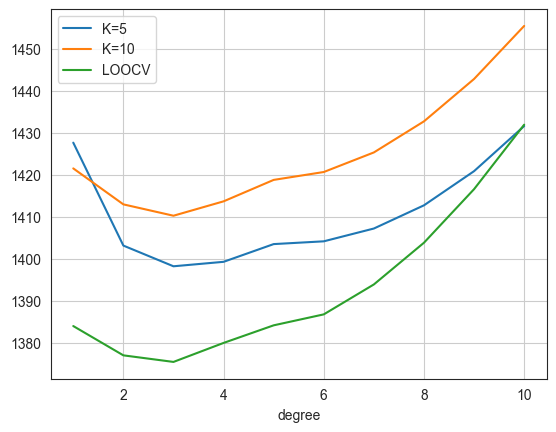

In [136]:
# from sklearn.linear_model import Lasso
def Lasso_KFold_MSE(alpha,k):
    kf = KFold(n_splits=k)
    MSE=[]
    for train_index, test_index in kf.split(X_stan,y):
        X_train_stan = X_stan.iloc[train_index]
        X_test_stan = X_stan.iloc[test_index]
        y_train = y.iloc[train_index]
        y_test = y.iloc[test_index]
        lasso=Lasso(alpha=alpha)
        lasso.fit(X_train_stan, y_train)
        MSE.append(mean_squared_error(lasso.predict(X_test_stan),y_test))     
    return MSE  
D=10
MSE_vect_5 = np.zeros(D)
MSE_vect_10 = np.zeros(D)
MSE_vect_LOO = np.zeros(D)
for i in range(D):
    MSE_vect_5[i] =  np.mean(Lasso_KFold_MSE(i+1,5))
    MSE_vect_10[i] =  np.mean(Lasso_KFold_MSE(i+1,10))
    MSE_vect_LOO[i] =  np.mean(Lasso_KFold_MSE(i+1,len(X_stan)))
plt.plot(range(1,D+1),MSE_vect_5,label='K=5')
plt.plot(range(1,D+1),MSE_vect_10,label='K=10')
plt.plot(range(1,D+1),MSE_vect_LOO,label='LOOCV')
plt.legend()
plt.grid(True)
plt.xlabel('degree')
plt.show()

In [137]:
min_index_5 = np.argmin(MSE_vect_5)
min_index_10 = np.argmin(MSE_vect_10)
min_index_LOO = np.argmin(MSE_vect_LOO)

min_value_5 = MSE_vect_5[min_index_5]
min_value_10 = MSE_vect_10[min_index_10]
min_value_LOO = MSE_vect_LOO[min_index_LOO]

print("K=5 最小值的坐标：")
print("Degree:", min_index_5 + 1)  
print("MSE:", min_value_5)

print("K=10 最小值的坐标：")
print("Degree:", min_index_10 + 1)  
print("MSE:", min_value_10)

print("LOOCV 最小值的坐标：")
print("Degree:", min_index_LOO + 1)  
print("MSE:", min_value_LOO)

alphalist=[0.01,0.1,1,5,10,50,100]
for alpha in alphalist:
    average_MSE = np.mean(Lasso_KFold_MSE(alpha,5))
    print("average MSE Value of alpha={} is {}".format(alpha, average_MSE))

K=5 最小值的坐标：
Degree: 3
MSE: 1398.205790046258
K=10 最小值的坐标：
Degree: 3
MSE: 1410.2362690448153
LOOCV 最小值的坐标：
Degree: 3
MSE: 1375.4463400939198
average MSE Value of alpha=0.01 is 1578.4647137676761
average MSE Value of alpha=0.1 is 1566.2794595632784
average MSE Value of alpha=1 is 1427.6238029802037
average MSE Value of alpha=5 is 1403.4864846987616
average MSE Value of alpha=10 is 1431.576698802528
average MSE Value of alpha=50 is 3909.381130392207
average MSE Value of alpha=100 is 6579.7671220397215


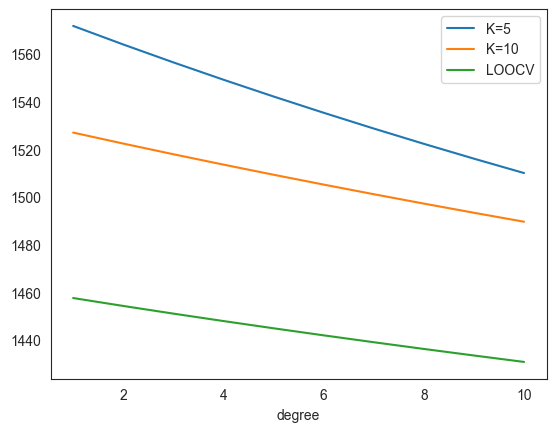

In [116]:
from sklearn.linear_model import Lasso
def Ridge_KFold_MSE(alpha,k):
    kf = KFold(n_splits=k)
    MSE=[]
    for train_index, test_index in kf.split(X_stan,y):
        X_train_stan = X_stan.iloc[train_index]
        X_test_stan = X_stan.iloc[test_index]
        y_train = y.iloc[train_index]
        y_test = y.iloc[test_index]
        ridge=Ridge(alpha=alpha)
        ridge.fit(X_train_stan, y_train)
        MSE.append(mean_squared_error(ridge.predict(X_test_stan),y_test))     
    return MSE  
D=10
MSE_vect_5 = np.zeros(D)
MSE_vect_10 = np.zeros(D)
MSE_vect_LOO = np.zeros(D)
for i in range(D):
    MSE_vect_5[i] =  np.mean(Ridge_KFold_MSE(i+1,5))
    MSE_vect_10[i] =  np.mean(Ridge_KFold_MSE(i+1,10))
    MSE_vect_LOO[i] =  np.mean(Ridge_KFold_MSE(i+1,len(X_stan)))
plt.plot(range(1,D+1),MSE_vect_5,label='K=5')
plt.plot(range(1,D+1),MSE_vect_10,label='K=10')
plt.plot(range(1,D+1),MSE_vect_LOO,label='LOOCV')
plt.legend()
plt.xlabel('degree')
plt.show()

In [117]:
min_index_5 = np.argmin(MSE_vect_5)
min_index_10 = np.argmin(MSE_vect_10)
min_index_LOO = np.argmin(MSE_vect_LOO)

min_value_5 = MSE_vect_5[min_index_5]
min_value_10 = MSE_vect_10[min_index_10]
min_value_LOO = MSE_vect_LOO[min_index_LOO]

print("K=5 最小值的坐标：")
print("Degree:", min_index_5 + 1)  
print("MSE:", min_value_5)

print("K=10 最小值的坐标：")
print("Degree:", min_index_10 + 1)  
print("MSE:", min_value_10)

print("LOOCV 最小值的坐标：")
print("Degree:", min_index_LOO + 1)  
print("MSE:", min_value_LOO)

alphalist=[0.01,0.1,1,5,10,50,100,110,120,130,150,155,156,160,1000]
for alpha in alphalist:
    average_MSE = np.mean(Ridge_KFold_MSE(alpha,5))
    print("average MSE Value of alpha={} is {}".format(alpha, average_MSE))

K=5 最小值的坐标：
Degree: 10
MSE: 1509.9787307563843
K=10 最小值的坐标：
Degree: 10
MSE: 1489.55646493841
LOOCV 最小值的坐标：
Degree: 10
MSE: 1430.7237838075378
average MSE Value of alpha=0.01 is 1579.737186536024
average MSE Value of alpha=0.1 is 1578.9947153560938
average MSE Value of alpha=1 is 1571.7262033495415
average MSE Value of alpha=5 is 1542.1097532527044
average MSE Value of alpha=10 is 1509.9787307563843
average MSE Value of alpha=50 is 1367.0356966116801
average MSE Value of alpha=100 is 1310.9493791347031
average MSE Value of alpha=110 is 1306.3835529694588
average MSE Value of alpha=120 is 1303.1060721409065
average MSE Value of alpha=130 is 1300.8879520217072
average MSE Value of alpha=150 is 1298.9410212254766
average MSE Value of alpha=155 is 1298.8751439830542
average MSE Value of alpha=156 is 1298.8793079018828
average MSE Value of alpha=160 is 1298.9506364288004
average MSE Value of alpha=1000 is 1648.2443334470322


# 2.1.1 Use Ridge to predict sales

In [138]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler(with_mean=False)
X_Datatest =  ss.fit_transform(Datatest)

In [139]:
ridge=Ridge(alpha=155)
ridge.fit(X_stan, y)
y_pred = ridge.predict(X_Datatest)
y_pred 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([ 4.50873102,  3.77450017,  4.64485204, ..., 12.37053805,
        3.98188395, 23.04406995])

In [140]:
Ridge_sales_df = pd.DataFrame(y_pred, columns=['sales predicted_sales'])
Ridge_sales_df

,sales predicted_sales
0,4.508731
1,3.774500
2,4.644852
3,1.415309
4,83.577658
...,...
1046,10.296328
1047,11.798376
1048,12.370538
1049,3.981884


# 2.2 Random forest 随机森林

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 2.2.1 Basic random forest 

In [81]:
features = Datatrain.columns.drop('sales').tolist()
X = Datatrain[features]
y = Datatrain['sales']

#split train as 20% validate + 80% train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#standardliaze
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Apply
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_val_scaled)
# MSE
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error on Validation Set:", mse)

Mean Squared Error on Validation Set: 1621.361600949367


# 2.2.2 Random forest +  GridSearchCV 网格搜索

In [82]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search 定义了一个参数搜索空间字典
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10,15],
    'min_samples_split': [2, 5, 10,15]
}

# Instantiate the Random Forest model初始化了一个随机森林回归模；p型
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search with cross-validation 对训练集数据进行超参数搜索，找到最佳的超参数组合。
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Use the best model to make predictions on the validation set
y_pred_best = best_rf_model.predict(X_val_scaled)

# Calculate MSE using the best model
mse_best = mean_squared_error(y_val, y_pred_best)
print("Best Mean Squared Error on Validation Set:", mse_best)
print("Best Parameters:", best_params)

Best Mean Squared Error on Validation Set: 1628.9332028663769
Best Parameters: {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}


# 2.2.3 Random forest +  RandomizedSearchCV 随机搜索

In [83]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter search space for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(10, 1000),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=30, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Perform the hyperparameter search
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_random = random_search.best_params_
print("Best Hyperparameters (Random Search):", best_params_random)

Best Hyperparameters (Random Search): {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 967}


In [84]:
best_rf_model = random_search.best_estimator_

y_pred_best = best_rf_model.predict(X_val_scaled)

# Calculate MSE using the best model
mse_best = mean_squared_error(y_val, y_pred_best)
mse_best

1499.0389597621415

# From the above, the model with RandomizedSearchCV added is the optimal model.

# 2.2.4 Derives the optimal test set prediction导出最优的test集预测结果

In [85]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(Datatest)
y_pred_test = best_rf_model.predict(X_test_scaled)

# Create a DataFrame with the predictions for the test set
test_predictions_df = pd.DataFrame(y_pred_test, columns=['predicted_sales'])

# Display the predictions for the test set
test_predictions_df

,predicted_sales
0,6.195119
1,7.658338
2,3.376187
3,4.441762
4,87.968346
...,...
1046,11.158921
1047,17.903825
1048,17.453396
1049,7.330227


# 2.3 XGBoost

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [87]:
#Divide the dataset into training set and test set
x=Datatrain.drop('sales', axis = 1)
y=Datatrain["sales"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)
x_train.shape

(1260, 24)

In [88]:
#Data Standardization
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)
x_train

array([[ 0.17673287,  1.19582918,  0.01372941, ...,  0.8834056 ,
         0.6392396 ,  0.70314235],
       [-1.59059581, -0.71993022, -0.6691279 , ..., -0.49903612,
        -0.5736344 , -0.64922625],
       [ 0.17673287, -0.71993022,  0.01372941, ...,  0.17837751,
         0.67524076,  1.36050007],
       ...,
       [-1.59059581, -1.67780992,  0.46896761, ..., -0.99532905,
        -1.39790176, -1.49884599],
       [ 0.17673287, -1.19887007, -0.6691279 , ..., -0.643281  ,
        -0.94281242, -0.87555931],
       [ 0.17673287, -0.71993022, -0.896747  , ..., -0.60940154,
        -0.85109284, -0.73100096]])

In [89]:
import xgboost as xgb
xgb.get_config()

{'use_rmm': False, 'verbosity': 1}

In [90]:
print(Datatrain.isnull().sum())

attribute1                                0
attribute2                                0
attribute3                                0
clickVolume                               0
avgOriginalUnitPrice                      0
avgFinalUnitPrice                         0
ma14SalesVolume                           0
weekday                                   0
meanAge                                   0
gender                                    0
meanEducation                             0
maritalStatus                             0
plus                                      0
meanPurchasePower                         0
meanUserLevel                             0
meanCityLevel                             0
sales                                     0
clickVolume-ma14SalesVolume               0
attribute2-avgOriginalUnitPrice           0
attribute2-weekday                        0
attribute2-meanAge                        0
attribute2-meanPurchasePower              0
avgOriginalUnitPrice-weekday    

In [91]:
data_dmatrix = xgb.DMatrix(x,label=y)

In [92]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
## Define the parameter search space for RandomizedSearchCV
param_grid = {
            'max_depth': [2, 3, 4, 5, 6, 7, 8],
            'n_estimators': [30, 50, 100, 300, 500, 1000,2000],
            'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.01, 0.02, 0.03, 0.05, 0.5],
            "gamma":[0.0, 0.1, 0.2, 0.3, 0.4],
            "reg_alpha":[0.0001,0.001, 0.01, 0.1, 1, 100],
            "reg_lambda":[0.0001,0.001, 0.01, 0.1, 1, 100],
            "min_child_weight": [2,3,4,5,6,7,8],
            "colsample_bytree": [0.6, 0.7, 0.8, 0.9],
            "subsample":[0.6, 0.7, 0.8, 0.9]}
# Initialize the RandomizedSearchCV
xgb_reg = XGBRegressor(seed=27) 
clf = RandomizedSearchCV(xgb_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
# Perform the hyperparameter search
clf.fit(x_train, y_train)
# Get the best hyperparameters
print("best_score_:",clf.best_params_,clf.best_score_)

best_score_: {'subsample': 0.7, 'reg_lambda': 0.001, 'reg_alpha': 0.01, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 8, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.7} -962.45168373406


In [93]:
#Apply the best xgboost model
clf.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.01, 0.02, 0.03,
                                                          0.05, 0.5],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [2, 3, 4, 5, 6, 7,
                                                             8],
                                        'n_estimators': [30, 50, 100, 300, 500,
                                                         1000, 2000],
                                        'reg_alpha': [0.0001, 0.001, 0.01, 0.1,
                                                      1, 100],
                                        'reg_lambda': [0.0001, 0.001, 0.01, 0.1,
                                                       1, 100],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   scoring='neg_mean_squared_error')

In [94]:
#Mean cross-validation score
from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(clf, x_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: -927.89


RMSE: 34.946468
R_Squared Score : 0.806031


<Figure size 3000x1500 with 0 Axes>

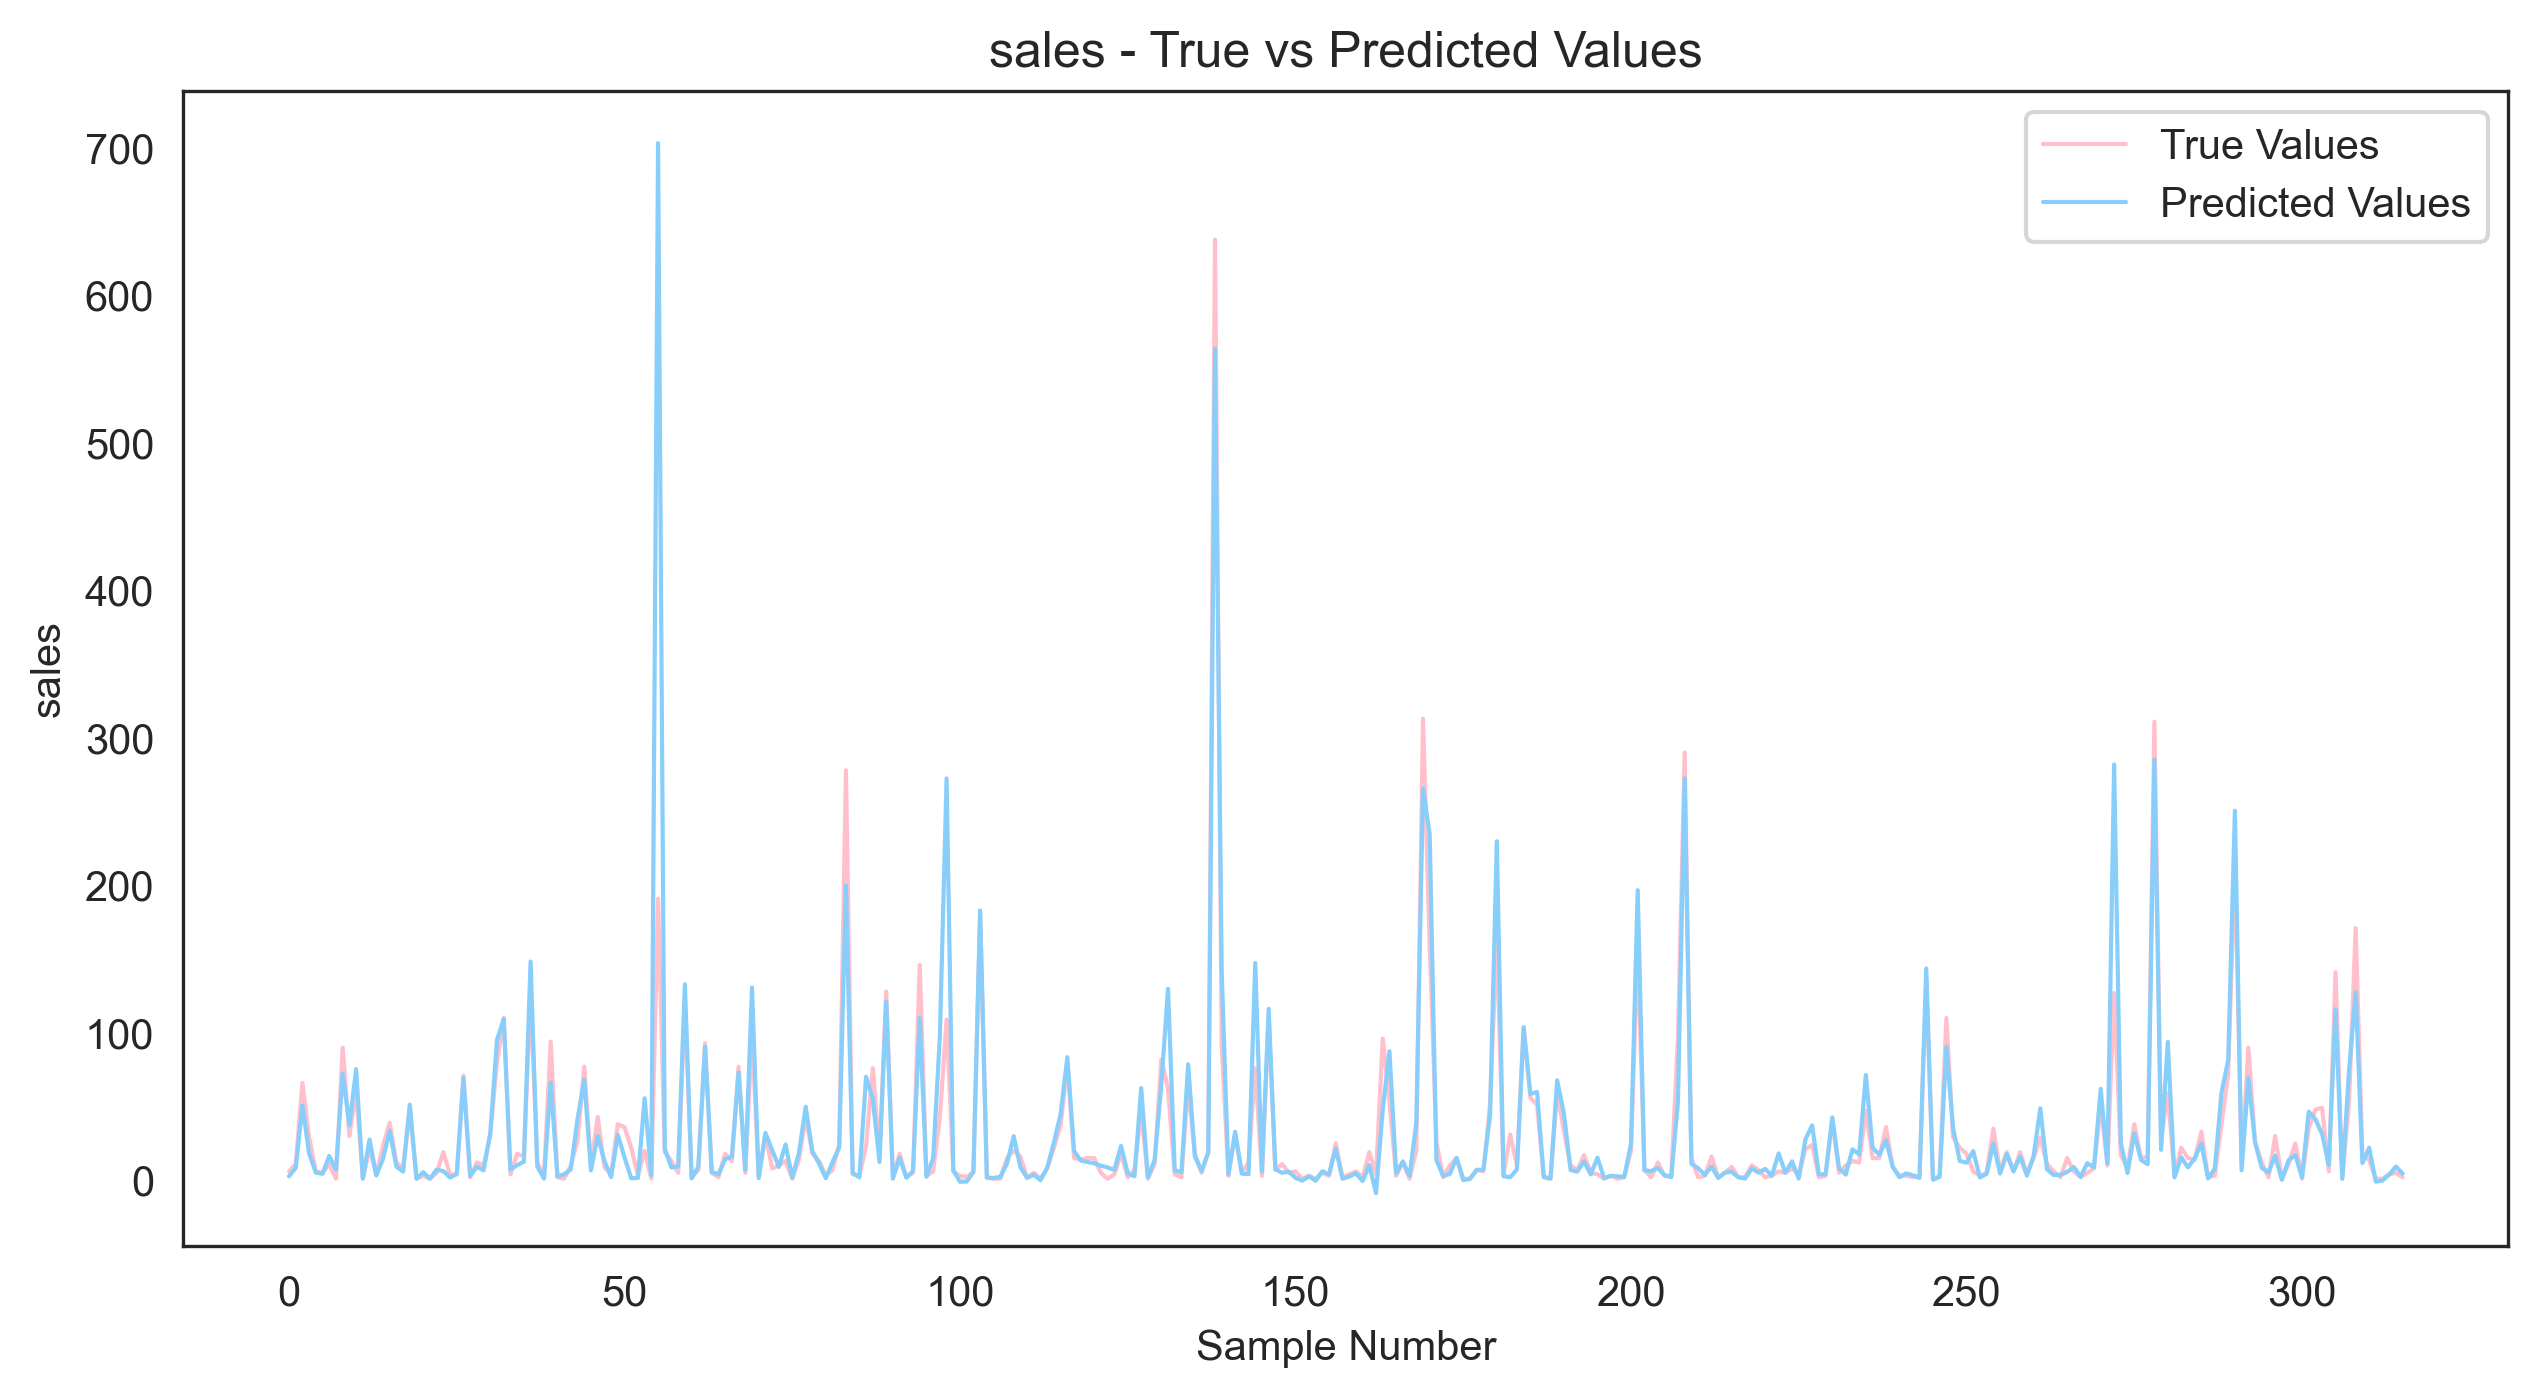

In [95]:
import seaborn as sns
predictions = clf.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))
r2 = np.sqrt(r2_score(y_test, predictions))
print("R_Squared Score : %f" % (r2))
plt.figure(figsize=(10, 5), dpi=300)
sns.set_style("white")
palette = sns.color_palette("husl", n_colors=2)
# Set canvas size and resolution
plt.figure(figsize=(10, 5), dpi=300)

# Plot a line chart of the true values and model predicted values of the test set data
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="True Values", color='pink', linewidth=1)
plt.plot(x_ax, predictions, label="Predicted Values", color='LightSkyBlue', linewidth=1)

# Add titles and tags
plt.title("sales - True vs Predicted Values")
plt.xlabel("Sample Number")
plt.ylabel("sales")
plt.legend()
plt.savefig('True vs Predicted Values.png')
plt.show()

In [96]:
MSE=mean_squared_error(y_test, predictions)
print(MSE)

1221.2556054647164


# 2.3.1 Using XGBoost to predict

In [97]:
Datatest['sales'] = np.nan  
Datatest

,attribute1,attribute2,attribute3,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,weekday,meanAge,gender,...,meanCityLevel,clickVolume-ma14SalesVolume,attribute2-avgOriginalUnitPrice,attribute2-weekday,attribute2-meanAge,attribute2-meanPurchasePower,avgOriginalUnitPrice-weekday,avgOriginalUnitPrice-meanAge,avgOriginalUnitPrice-meanPurchasePower,sales
0,3.0,100.0,2,173.0,180.835683,165.459988,12.857143,4,26.960521,0.053158,...,1.997034,2224.285714,18083.568333,400.0,2696.052088,234.795269,723.342733,4875.424216,424.593628,NaN
1,4.0,100.0,9,142.0,190.802856,138.995392,2.285714,5,33.111475,0.317086,...,1.385002,324.571429,19080.285642,500.0,3311.147515,240.979515,954.014282,6317.764039,459.795798,NaN
2,3.0,100.0,1,144.0,127.385574,123.286542,4.500000,6,30.353550,0.000000,...,2.369596,648.000000,12738.557355,600.0,3035.355048,195.554140,764.313441,3866.604438,249.107763,NaN
3,3.0,100.0,2,220.0,240.873276,168.258175,17.500000,6,29.692379,0.000000,...,2.505191,3850.000000,24087.327642,600.0,2969.237939,193.293841,1445.239659,7152.100708,465.593208,NaN
4,3.0,90.0,2,4079.0,85.013188,68.521885,115.785714,7,33.128355,0.201974,...,2.669685,472289.928571,7651.186958,630.0,2981.551964,218.530495,595.092319,2816.347099,206.421935,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,2.0,50.0,1,212.0,70.289424,58.684552,5.357143,6,26.794008,0.558049,...,1.758180,1135.714286,3514.471193,300.0,1339.700388,132.021470,421.736543,1883.335368,185.594261,NaN
1047,4.0,100.0,6,1044.0,210.529395,174.739314,10.071429,5,34.052881,0.164406,...,2.101402,10514.571429,21052.939522,500.0,3405.288063,220.946207,1052.646976,7169.132365,465.156714,NaN
1048,3.0,100.0,2,1040.0,235.563711,190.538695,3.571429,5,38.025742,0.371263,...,1.577160,3714.285714,23556.371103,500.0,3802.574187,208.813037,1177.818555,8957.484870,491.887740,NaN
1049,3.0,100.0,2,324.0,239.301695,192.178675,6.428571,2,35.851558,0.519561,...,1.278792,2082.857143,23930.169467,200.0,3585.155761,198.242322,478.603389,8579.338493,474.397236,NaN


In [98]:
x1=Datatest.drop('sales', axis = 1)

In [99]:
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
x1 = ss_x.fit_transform(x1)
x1

array([[ 0.14126846,  1.18323522, -0.66570381, ...,  0.42993203,
         0.233353  ,  0.8144716 ],
       [ 1.93010163,  1.18323522,  1.08031505, ...,  0.98258755,
         0.79835788,  1.03326314],
       [ 0.14126846,  1.18323522, -0.91513507, ...,  0.52809189,
        -0.16182994, -0.27622319],
       ...,
       [ 0.14126846,  1.18323522, -0.66570381, ...,  1.51879007,
         1.83241042,  1.23272372],
       [ 0.14126846,  1.18323522, -0.66570381, ..., -0.15642788,
         1.6842799 ,  1.12401525],
       [ 0.14126846, -0.70814153,  0.83088379, ...,  0.05133159,
        -0.69988758, -0.67645082]])

In [100]:
predictions1 = clf.predict(x1)
Datatest['sales']=predictions1

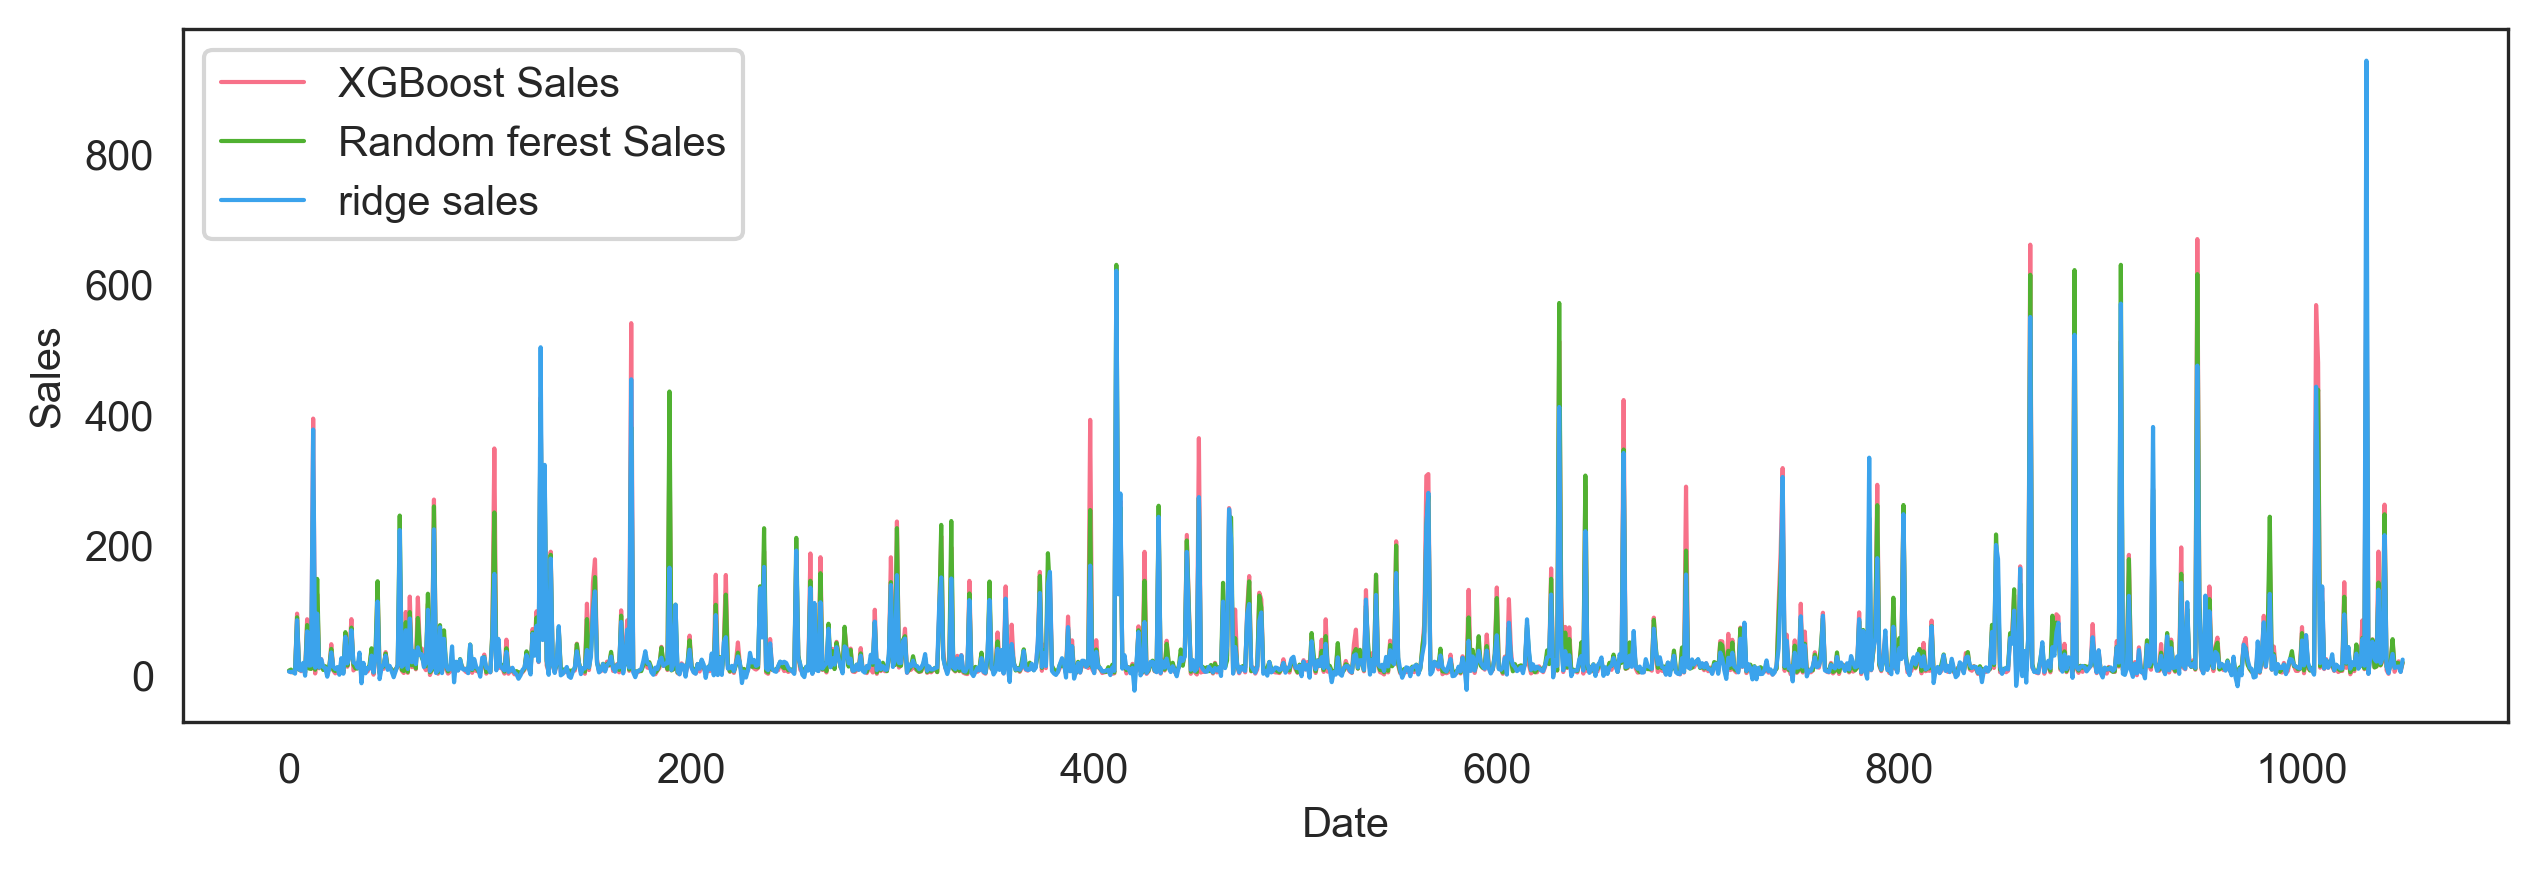

In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")

palette = sns.color_palette("husl", n_colors=3)
plt.figure(figsize=(10, 3), dpi=300)

df_pred1 = pd.DataFrame(predictions1, columns=['sales1'])

df_pred2 = pd.DataFrame(y_pred_test, columns=['predicted_sales'])

df_pred3 = pd.DataFrame(y_pred, columns=['sales Predicted Values'])


sns.lineplot(x=range(len(x1)), y='sales1', data=df_pred1, color=palette[0], label='XGBoost Sales', linewidth=1)
sns.lineplot(x=range(len(x1)), y='predicted_sales', data=df_pred2, color=palette[1], label='Random ferest Sales', linewidth=1)
sns.lineplot(x=range(len(x1)), y='sales Predicted Values', data=df_pred3, color=palette[2], label='ridge sales', linewidth=1)

plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Step 3.  Find optimal inventory

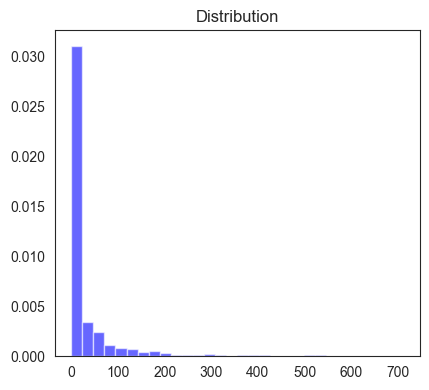

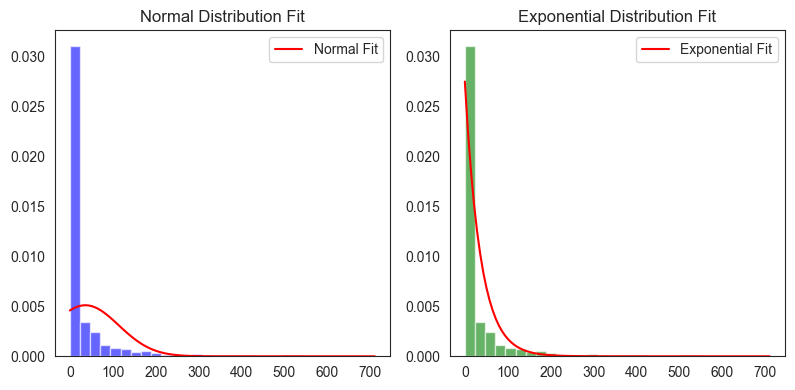

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, poisson
from scipy.stats import shapiro, kstest


data=pd.DataFrame(predictions1, columns=['sales'])
data=np.array(data,dtype=float)

# Draw a histogram
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(data, bins=30, density=True, alpha=0.6, color='b')
plt.title('Distribution')

plt.tight_layout()
plt.show()

# Fit distribution curves and assess fit quality
# Normal distribution fitting
params_normal = norm.fit(data)
fit_normal = norm(*params_normal)
x_normal = np.linspace(min(data), max(data), 100)
pdf_normal = fit_normal.pdf(x_normal)

# exponential distribution fitting
params_exponential = expon.fit(data)
fit_exponential = expon(*params_exponential)
x_exponential = np.linspace(min(data), max(data), 100)
pdf_exponential = fit_exponential.pdf(x_exponential)

# Draw fitting curve
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(data, bins=30, density=True, alpha=0.6, color='b')
plt.plot(x_normal, pdf_normal, 'r-', label='Normal Fit')
plt.legend()
plt.title('Normal Distribution Fit')

plt.subplot(1, 3, 2)
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.plot(x_exponential, pdf_exponential, 'r-', label='Exponential Fit')
plt.legend()
plt.title('Exponential Distribution Fit')

plt.tight_layout()
plt.show()

In [144]:
##Use the Shapiro-Wilk test to test whether it obeys the normal distribution
import scipy.stats as stats
print(stats.shapiro(data))
##The closer the value of W is to 1, the better it indicates that the data fits the normal distribution. If the P value is > the specified level, the null hypothesis is not rejected, and the sample data can be considered to obey the normal distribution.

ShapiroResult(statistic=0.44336408376693726, pvalue=0.0)


/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Lambda (MLE) for Poisson: 1.0
Mu (MLE) for Exponential: -1033.24


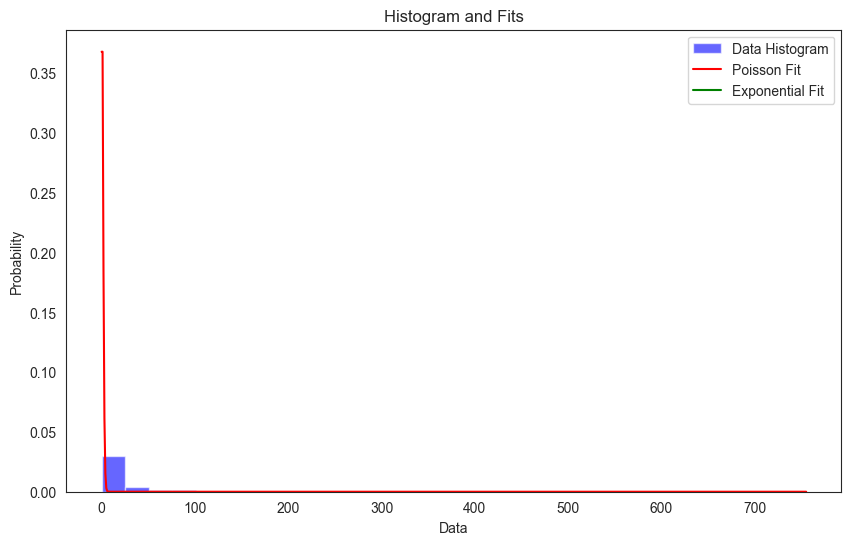

Chi-square statistic: nan
Critical value at alpha=0.05: 818.9912191705531
Data does not fit Poisson distribution (at alpha=0.05)


/var/folders/fj/c6krp5xj7wn9rl0bxxb7p6_m0000gn/T/ipykernel_4181/3215329007.py:56: RuntimeWarning: divide by zero encountered in divide
  chi_square_stat = np.sum((observed_counts - expected_counts)**2 / expected_counts)
/var/folders/fj/c6krp5xj7wn9rl0bxxb7p6_m0000gn/T/ipykernel_4181/3215329007.py:56: RuntimeWarning: overflow encountered in divide
  chi_square_stat = np.sum((observed_counts - expected_counts)**2 / expected_counts)
/var/folders/fj/c6krp5xj7wn9rl0bxxb7p6_m0000gn/T/ipykernel_4181/3215329007.py:56: RuntimeWarning: invalid value encountered in divide
  chi_square_stat = np.sum((observed_counts - expected_counts)**2 / expected_counts)


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, expon
from scipy.optimize import minimize
from scipy.stats import chi2


data = pd.read_csv('/Users/zhuyani/Desktop/xgboost-prediction.csv', index_col=0)
data = np.array(data, dtype=float)

# Define the log-likelihood function of the Poisson distribution
def neg_log_likelihood_poisson(lambda_, data):
    return -np.sum(poisson.logpmf(data, lambda_))

# Define the log-likelihood function for the exponential distribution
def neg_log_likelihood_expon(mu, data):
    return -np.sum(expon.logpdf(data, scale=1/mu))

# initial parameter value
initial_lambda = 1.0
initial_mu = 1.0

# Fit Poisson and exponential distributions using maximum likelihood estimation
result_poisson = minimize(neg_log_likelihood_poisson, initial_lambda, args=(data,))
lambda_mle = result_poisson.x[0]

result_expon = minimize(neg_log_likelihood_expon, initial_mu, args=(data,))
mu_mle = result_expon.x[0]

print("Lambda (MLE) for Poisson:", lambda_mle)
print("Mu (MLE) for Exponential:", mu_mle)

# Generate fitted curves for Poisson and exponential distributions
x_poisson = np.arange(0, np.max(data) + 1)
pmf_poisson = poisson.pmf(x_poisson, lambda_mle)

x_expon = np.linspace(0, np.max(data), 100)
pdf_expon = expon.pdf(x_expon, scale=1/mu_mle)

# Plot histograms and fitted curves
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='b', label='Data Histogram')
plt.plot(x_poisson, pmf_poisson, 'r-', label='Poisson Fit')
plt.plot(x_expon, pdf_expon, 'g-', label='Exponential Fit')
plt.xlabel('Data')
plt.ylabel('Probability')
plt.title('Histogram and Fits')
plt.legend()
plt.show()

# Perform hypothesis testing
# Chi-square goodness-of-fit test (for Poisson distribution)
observed_counts, bin_edges = np.histogram(data, bins=x_poisson)
expected_counts = len(data) * poisson.pmf(bin_edges[:-1], lambda_mle)
chi_square_stat = np.sum((observed_counts - expected_counts)**2 / expected_counts)
chi_square_crit = chi2.ppf(0.95, len(observed_counts) - 1)

print("Chi-square statistic:", chi_square_stat)
print("Critical value at alpha=0.05:", chi_square_crit)
if chi_square_stat < chi_square_crit:
    print("Data fits Poisson distribution (at alpha=0.05)")
else:
    print("Data does not fit Poisson distribution (at alpha=0.05)")

# From this we can see that the sales we predict are more likely to be exponentially distributed

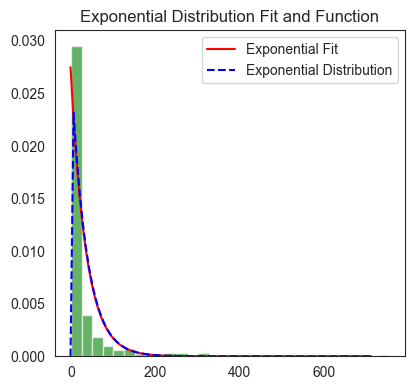

In [146]:
# Parameters of exponential distribution
scale_parameter = params_exponential[1]  

# Function that generates an exponential distribution
exp_dist_func = expon(scale=scale_parameter)

# Draw fitting curve
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 2)
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.plot(x_exponential, pdf_exponential, 'r-', label='Exponential Fit')
plt.plot(x_exponential, exp_dist_func.pdf(x_exponential), 'b--', label='Exponential Distribution')
plt.legend()
plt.title('Exponential Distribution Fit and Function')

plt.tight_layout()
plt.show()

In [185]:
import numpy as np 
from scipy.stats import expon
predicted_sales = predictions1
inventory_decision = np.floor(predicted_sales)
cost_price = 12 
selling_price = 20 
salvage_price = 8
daily_profit = (selling_price * inventory_decision) - (cost_price * inventory_decision) + (salvage_price * (predicted_sales - inventory_decision))
errors = predicted_sales - inventory_decision 
scale_param = np.mean(errors)
error_dist = expon(scale=scale_param)
modeled_errors = error_dist.rvs(size=len(predicted_sales))
updated_inventory_decision = inventory_decision + np.floor(modeled_errors)
predicted_inventory = updated_inventory_decision
#print(predicted_inventory)
inventory_profit_df = pd.DataFrame({'Predicted_Sales': predicted_sales, 'Inventory_Decision': predicted_inventory, 'Daily_Profit': daily_profit})
inventory_profit_df

,Predicted_Sales,Inventory_Decision,Daily_Profit
0,5.495758,5.0,43.966064
1,3.583113,3.0,28.664906
2,3.994521,3.0,31.956171
3,3.600917,4.0,28.807337
4,93.650658,93.0,749.205261
...,...,...,...
1046,4.272185,4.0,34.177483
1047,13.858438,14.0,110.867508
1048,20.375818,20.0,163.006546
1049,4.518431,4.0,36.147449


In [188]:
import numpy as np
from scipy.stats import expon
import pandas as pd

# predicted_sales: Predicted sales values obtained from a model
predicted_sales = predictions1

# Calculate the inventory decision by taking the floor of predicted sales
inventory_decision = np.floor(predicted_sales)

# Cost and pricing parameters
cost_price = 12
selling_price = 20
salvage_price = 8

# Calculate daily profit based on inventory decisions and sales
daily_profit = (selling_price * inventory_decision) - (cost_price * inventory_decision) + (salvage_price * (predicted_sales - inventory_decision))

# Calculate errors between predicted sales and inventory decision
errors = predicted_sales - inventory_decision

# Calculate scale parameter for error distribution
scale_param = np.mean(errors)

# Create an exponential distribution for modeling errors
error_dist = expon(scale=scale_param)

# Generate modeled errors based on the error distribution
modeled_errors = error_dist.rvs(size=len(predicted_sales))

# Update inventory decisions based on modeled errors
updated_inventory_decision = inventory_decision + np.floor(modeled_errors)

# Assign updated inventory decisions to predicted inventory
predicted_inventory = updated_inventory_decision

# Create a DataFrame to store predicted sales, inventory decisions, and daily profit
inventory_profit_df = pd.DataFrame({'Predicted_Sales': predicted_sales,
                                    'Inventory_Decision': predicted_inventory,
                                    'Daily_Profit': daily_profit})
inventory_profit_df

,Predicted_Sales,Inventory_Decision,Daily_Profit
0,5.495758,5.0,43.966064
1,3.583113,3.0,28.664906
2,3.994521,3.0,31.956171
3,3.600917,3.0,28.807337
4,93.650658,93.0,749.205261
...,...,...,...
1046,4.272185,4.0,34.177483
1047,13.858438,13.0,110.867508
1048,20.375818,21.0,163.006546
1049,4.518431,4.0,36.147449
